## 引用Keras

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D


Using TensorFlow backend.


## 讀取MNIST 數據

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train = x_train.reshape(60000, 28,28,1)
x_test  = x_test.reshape(10000, 28,28,1)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [6]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

## 設定網路參數

In [7]:
n_hidden_1 = 256 
n_classes  = 10 

training_epochs = 15
batch_size = 100

## 建立卷積神經網路

In [8]:
model = keras.Sequential()
model.add(Conv2D(
            filters=16,
            kernel_size = (3,3),
            padding = 'same',
            input_shape = (28,28,1), 
            activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(n_hidden_1, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


## 訓練神經網路

In [10]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=15,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 11s 189us/step - loss: 0.2057 - acc: 0.9396 - val_loss: 0.0887 - val_acc: 0.9722
Epoch 2/15
60000/60000 [==============================] - 11s 184us/step - loss: 0.0644 - acc: 0.9809 - val_loss: 0.0544 - val_acc: 0.9829
Epoch 3/15
60000/60000 [==============================] - 12s 194us/step - loss: 0.0429 - acc: 0.9869 - val_loss: 0.0484 - val_acc: 0.9836
Epoch 4/15
60000/60000 [==============================] - 12s 197us/step - loss: 0.0298 - acc: 0.9907 - val_loss: 0.0441 - val_acc: 0.9858
Epoch 5/15
60000/60000 [==============================] - 12s 199us/step - loss: 0.0218 - acc: 0.9931 - val_loss: 0.0460 - val_acc: 0.9851
Epoch 6/15
60000/60000 [==============================] - 12s 204us/step - loss: 0.0157 - acc: 0.9951 - val_loss: 0.0486 - val_acc: 0.9844
Epoch 7/15
60000/60000 [==============================] - 12s 199us/step - loss: 0.0113 - acc: 0.9968 - val_loss: 0.

## 辨識數字

In [11]:
from PIL import Image
import numpy
img = Image.open('/Users/davidchiu/Desktop/4.jpg').convert('L')
img  = numpy.asarray(img) 

In [13]:
img2 = (255 - img) / 255 

In [15]:
img3 = img2.reshape(28,28,1)

In [16]:
y = numpy.array([img3])

In [17]:
numpy.argmax(model.predict(y))

4

## 驗證碼破解

### 抓取驗證碼

In [95]:
import requests
res = requests.get('https://serv.gcis.nat.gov.tw/pub/kaptcha.jpg?code=0.4599771997252926')
with open('captcha.jpg', 'wb') as f:
    f.write(res.content)

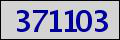

In [96]:
from PIL import Image
Image.open('captcha.jpg')

### 使用OpenCV 切驗證碼

In [97]:
pil_image = Image.open('captcha.jpg').convert('L') 

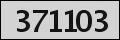

In [98]:
pil_image

In [99]:
open_cv_image = numpy.array(pil_image) 
open_cv_image.shape

(40, 120)

In [100]:
open_cv_image

array([[  0,  10,   0, ...,   0,  10,   0],
       [ 14, 188, 215, ..., 215, 188,  14],
       [  0, 217, 223, ..., 223, 217,   0],
       ...,
       [  0, 217, 223, ..., 223, 217,   0],
       [ 14, 188, 215, ..., 215, 188,  14],
       [  0,  10,   0, ...,   0,  10,   0]], dtype=uint8)

In [101]:
import cv2
ret, thresh = cv2.threshold(open_cv_image, 127, 255, 0)

In [102]:
thresh

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       ...,
       [  0, 255, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [103]:
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [104]:
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])


In [105]:
ary = []
for (c,_) in cnts:
    (x,y,w,h) = cv2.boundingRect(c)
    print(x,y,w,h)
    if w >= 10 and w <= 25 and h >= 24:
        ary.append((x,y,w,h) )

1 1 118 38
16 9 15 24
32 9 17 24
49 9 14 24
64 9 14 24
75 9 18 24
80 13 8 16
94 9 15 24


In [106]:
ary

[(16, 9, 15, 24),
 (32, 9, 17, 24),
 (49, 9, 14, 24),
 (64, 9, 14, 24),
 (75, 9, 18, 24),
 (94, 9, 15, 24)]

In [108]:
import os
dest = 'digits/'
#os.mkdir(dest)

In [109]:
#for i in range(0,10):
#    os.mkdir(dest+str(i))

Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


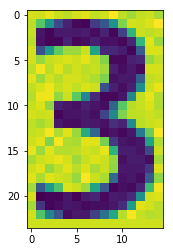

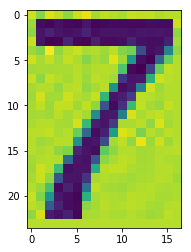

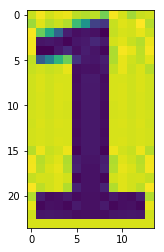

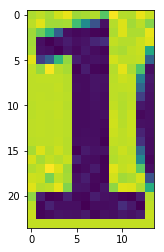

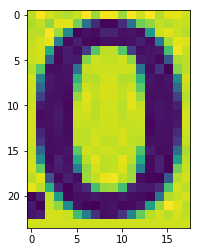

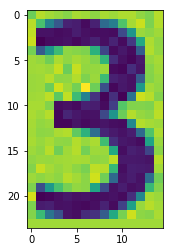

In [110]:
%pylab inline
from matplotlib import pyplot as plt
data = []
for idx, (x,y,w,h) in enumerate(ary):
    fig = plt.figure()
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    plt.imshow(thresh)
    plt.savefig(os.path.join(dest, '{}.jpg'.format(idx)), dpi=100)

In [123]:
import random
random.random()

0.9508377651837443

In [130]:

def getCaptcha(run):
    res = requests.get('https://serv.gcis.nat.gov.tw/pub/kaptcha.jpg?code={}'.format(random.random()))
    with open('captcha.jpg', 'wb') as f:
        f.write(res.content)
    
    pil_image = Image.open('captcha.jpg').convert('L')
    open_cv_image = numpy.array(pil_image) 
    ret, thresh = cv2.threshold(open_cv_image, 127, 255, 0)
    image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])
    ary = []
    for (c,_) in cnts:
        (x,y,w,h) = cv2.boundingRect(c)
        #print(x,y,w,h)
        if w >= 10 and w <= 25 and h >= 24:
            ary.append((x,y,w,h) )
    data = []
    for idx, (x,y,w,h) in enumerate(ary):
        fig = plt.figure()
        roi = open_cv_image[y:y+h, x:x+w]
        thresh = roi.copy()
        plt.imshow(thresh)
        plt.savefig(os.path.join(dest, '{}_{}.jpg'.format(run,idx)), dpi=100)

In [131]:
#getCaptcha(1)

In [133]:
#for i in range(1,20):
#    getCaptcha(i)

In [134]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (60, 40,
3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Fully Connected
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                        loss ='categorical_crossentropy', 
                     metrics = ['accuracy'])

In [136]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,     #x坐标保持不变，而对应的y坐标按比例发生平移
                                   zoom_range = 0.2,      #可以让图片在长或宽的方向进行放大
                                   horizontal_flip = True #水平翻转操作
                                  )

In [137]:
training_set = train_datagen.flow_from_directory(
    'digits/', target_size = (60, 40),
     batch_size = 10,
     class_mode = 'categorical')

Found 105 images belonging to 10 classes.


In [138]:
history = classifier.fit_generator(training_set,
                         nb_epoch=10,
                         nb_val_samples=10,
                         steps_per_epoch = 10,
                         verbose = 1)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=10, verbose=1, epochs=10, validation_steps=10)`
  """


Epoch 1/10
10/10 [==============================] - 1s 91ms/step - loss: 2.3300 - acc: 0.1287
Epoch 2/10
10/10 [==============================] - 1s 81ms/step - loss: 2.2633 - acc: 0.1507
Epoch 3/10
10/10 [==============================] - 1s 91ms/step - loss: 2.1555 - acc: 0.3086
Epoch 4/10
10/10 [==============================] - 1s 73ms/step - loss: 1.8767 - acc: 0.3187
Epoch 5/10
10/10 [==============================] - 1s 83ms/step - loss: 1.5093 - acc: 0.5086
Epoch 6/10
10/10 [==============================] - 1s 88ms/step - loss: 0.9305 - acc: 0.7200
Epoch 7/10
10/10 [==============================] - 1s 74ms/step - loss: 0.7063 - acc: 0.7096
Epoch 8/10
10/10 [==============================] - 1s 81ms/step - loss: 0.4849 - acc: 0.8202
Epoch 9/10
10/10 [==============================] - 1s 98ms/step - loss: 0.3047 - acc: 0.9300
Epoch 10/10
10/10 [==============================] - 1s 93ms/step - loss: 0.2094 - acc: 0.9416


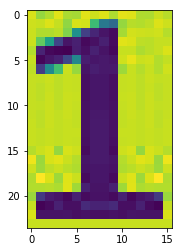

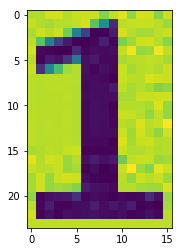

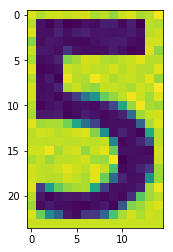

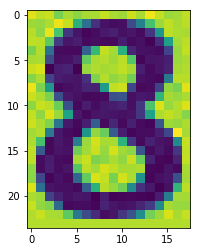

In [195]:
getCaptcha(1)

In [196]:
from keras.preprocessing import image
for f in os.listdir('digits/predict/'):
    fig = plt.figure()
    test_image = image.load_img('digits/predict/'+f, target_size= (60,40))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    print(f, classifier.predict_classes(test_image))
    #plt.imshow(img)

1_3.jpg [8]
1_2.jpg [5]
1_0.jpg [1]
1_1.jpg [1]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [142]:
classifier.save('captchabreak.hd5')